# SB - Analysis

This Jupyter notebook reproduces the panels from Figure 3, which explores the transposon insertions and commonly targeted genes (CTGs) identified in the Sleeping Beauty (SB) ILC dataset.

The dataset contains a total of 123 tumors from WapCre;Cdh1F/F;SB mice. Insertions were identified in these tumors using IM-Fusion, which was run separately from this notebook using a Snakemake pipeline (see the documentation for information on how to run this pipeline). Here we focus on analysing the results of the IM-Fusion run to visualize the effects of insertions.

In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('white')

## Example cases

### Insertions

To evaluate the effect of individual insertions, we can visualize individual insertions together with the expression of their target genes in the corresponding sample. To illustrate this, we first pick two genes to visualize based on the CTG list from IM-Fusion.

In [2]:
de_ctgs = (pd.read_csv('../data/processed/sb/star/ctgs.txt', sep='\t')
           .query('de_pvalue < 0.05'))
de_ctgs.head()

,gene_id,gene_name,p_value,q_value,n_samples,de_pvalue,de_direction,de_test
0,ENSMUSG00000019907,Ppp1r12a,2.136308e-99,7.370264e-97,41,4.928289e-17,-1,exon
1,ENSMUSG00000038679,Trps1,3.813430e-95,1.315633e-92,44,5.408386e-16,-1,exon
3,ENSMUSG00000022443,Myh9,9.094464e-70,3.137590e-67,27,1.927143e-08,-1,exon
4,ENSMUSG00000026510,Trp53bp2,2.548673e-27,8.792922e-25,12,4.034261e-07,1,exon
5,ENSMUSG00000032440,Tgfbr2,5.572407e-19,1.922481e-16,9,6.170961e-05,-1,exon


Here we see (based on the de_pvalue and de_direction columns) that *Ppp1r12a*, *Trps1* and *Myh9* all show a significant decrease in expression, whilst *Trp53bp2* is the only gene with a signficant increase in expression (p < 0.05). For visualization purposes, we would like to use an example with an increase in expression (*Trp53bp2*) and one with a decrease (*Trps1*).

Next, to chose a specific insertion, we read the insertion results from IM-Fusion and pick the strongest insertion for each gene. This way, we can be relatively confident that the insertion we pick will also actually have an observable effect on expression.

In [3]:
from IPython.display import display

from imfusion.model import Insertion

# Read insertions.
insertions = Insertion.read_csv('../data/processed/sb/star/insertions.txt', sep='\t')
insertion_lookup = {ins.id: ins for ins in Insertion.from_frame(insertions)}

# Select a strong Trp53bp2 insertion.
print('Trp53bp2')
display(insertions.query('gene_name == "Trp53bp2"')
                  .sort_values(by='support', ascending=False)
                  .head(n=1))

print('Trps1')
display(insertions.query('gene_name == "Trps1"')
                  .sort_values(by='support', ascending=False)
                  .head(n=1))

Trp53bp2


,id,seqname,position,strand,support_junction,support_spanning,support,feature_name,feature_strand,feature_type,ffpm,ffpm_junction,ffpm_spanning,gene_id,gene_name,gene_strand,novel_transcript,orientation,sample,transposon_anchor
302,2049_13_11KOU051-R3.INS_4,1,182448400,1,23,0,23,SD,1,SD,1.506165,1.506165,0.0,ENSMUSG00000026510,Trp53bp2,1.0,NaN,sense,2049_13_11KOU051-R3,1043


Trps1


,id,seqname,position,strand,support_junction,support_spanning,support,feature_name,feature_strand,feature_type,ffpm,ffpm_junction,ffpm_spanning,gene_id,gene_name,gene_strand,novel_transcript,orientation,sample,transposon_anchor
1077,2800_34_12SKA091-L3.INS_27,15,50822104,1,142,0,142,En2SA,-1,SA,7.65557,7.65557,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_34_12SKA091-L3,1541


In [4]:
(insertions.query('gene_name == "Trps1"')
           .sort_values(by='support', ascending=False)
           .head())

,id,seqname,position,strand,support_junction,support_spanning,support,feature_name,feature_strand,feature_type,ffpm,ffpm_junction,ffpm_spanning,gene_id,gene_name,gene_strand,novel_transcript,orientation,sample,transposon_anchor
1077,2800_34_12SKA091-L3.INS_27,15,50822104,1,142,0,142,En2SA,-1,SA,7.655570,7.655570,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_34_12SKA091-L3,1541
976,2800_25_12SKA075-R5.INS_8,15,50822104,1,80,0,80,En2SA,-1,SA,9.291709,9.291709,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_25_12SKA075-R5,1541
1518,2800_58_12SKA127-R3.INS_21,15,50822104,1,65,0,65,En2SA,-1,SA,4.185935,4.185935,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_58_12SKA127-R3,1541
1128,2800_36_12SKA092-L2.INS_10,15,50846013,1,55,0,55,En2SA,-1,SA,3.477064,3.477064,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,2800_36_12SKA092-L2,1541
0,1566_10_11KOU023.INS_14,15,50822104,1,31,0,31,En2SA,-1,SA,1.900036,1.900036,0.0,ENSMUSG00000038679,Trps1,-1.0,NaN,antisense,1566_10_11KOU023,1541


Now, we start building the actual visualization. For creating the plots, we use a Python package called **geneviz**, which we specifically created for the purpose of creating track-based genomic plots in Python.

The plots we plan to create contain the following tracks:
- Exon coverage - to show the expression of exons
- Junction support - to show the expression of splice junctions
- Insertion positions - to show the location of the insertion 
- Gene annotation - to show the structure of the corresponding gene

As such, we need the following data:
- BAM files from STAR (used to calculate exon coverage)
- SJ.out.tab from STAR (used to quantify splice junction support)
- An insertion lookup map (to retrieve the individual insertions by id)

The insertion lookup we can easily build using the previously loaded insertion data. To obtain paths to the BAM and SJ.out.tab files for each sample, we loop through the STAR output directories as follows:

In [5]:
from pathlib import Path
from imfusion.model import Insertion

# Build insertion lookup (id -> insertion).
insertion_lookup = {ins.id: ins for ins in Insertion.from_frame(insertions)}

# Get junction and bam paths for samples.
base_dir = Path('../data/interim/sb/star')

junction_paths = {fp.parent.parent.name: fp 
                  for fp in base_dir.glob('**/SJ.out.tab')
                  if '_STARpass1' not in str(fp)}

bam_paths = {fp.parent.name: fp 
             for fp in base_dir.glob('**/alignment.bam')}

Finally, we use the *plot_insertion* function (see source code for more details on how this works) to create the previously described plots using the different data types:

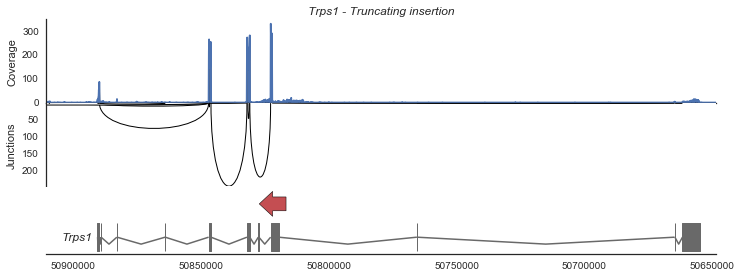

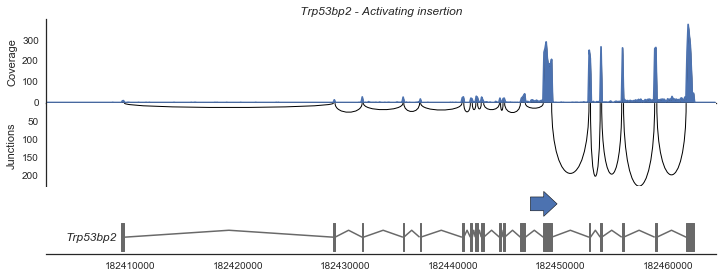

In [6]:
from nbsupport.insertions import plot_insertion

# Prepare required indices for two bam files.
# ! samtools index ../data/interim/sb/star/2049_13_11KOU051-R3/alignment.bam
# ! samtools index ../data/interim/sb/star/2800_34_12SKA091-L3/alignment.bam

# Plot Trps1 insertion.
insertion = insertion_lookup['2800_34_12SKA091-L3.INS_27']
fig = plot_insertion(insertion, junction_paths[insertion.metadata['sample']],
                     bam_paths[insertion.metadata['sample']],
                     region=('15', 50648752, 50910463), reverse=True)
fig.axes[0].set_title('Trps1 - Truncating insertion', style='italic')

# Plot Trp53bp2 insertion.
insertion = insertion_lookup['2049_13_11KOU051-R3.INS_4']
fig = plot_insertion(insertion, junction_paths[insertion.metadata['sample']],
                     bam_paths[insertion.metadata['sample']],
                     region=('1', 182402172, 182464432), reverse=False)
fig.axes[0].set_title('Trp53bp2 - Activating insertion', style='italic')

# Plot again for manuscript.
with sns.plotting_context('paper', font_scale=0.7):
   
    # Plot Trps1 insertion.
    insertion = insertion_lookup['2800_34_12SKA091-L3.INS_27']
    fig = plot_insertion(insertion, 
                         junction_paths[insertion.metadata['sample']],
                         bam_paths[insertion.metadata['sample']],
                         region=('15', 50648752, 50910463), reverse=True,
                         figsize=(6.2, 1.5), fontsize=6)
    fig.axes[0].set_title('Trps1 - Truncating insertion', style='italic')
    fig.savefig('../reports/figures/fig_3a_trps1.pdf', bbox_inches='tight')
    plt.close(fig)
    
    # Plot Trp53bp2 insertion.
    insertion = insertion_lookup['2049_13_11KOU051-R3.INS_4']
    fig = plot_insertion(insertion,
                         junction_paths[insertion.metadata['sample']],
                         bam_paths[insertion.metadata['sample']],
                         region=('1', 182402172, 182464432), reverse=False,
                         figsize=(6.2, 1.5), fontsize=6);
    fig.axes[0].set_title('Trp53bp2 - Activating insertion', style='italic');
    fig.savefig('../reports/figures/fig_3c_trp53bp2.pdf', bbox_inches='tight')
    plt.close(fig)

The first plot shows the selected antisense insertion in *Trps1*, which results in truncation of the gene transcript. As previously explained, the insertion (red arrow) is shown above the main transcript of the gene, together with expression levels of the gene. The expression of the exons is shown at the top in blue, which reflects the number of reads covering the various exons. Similarly, the black arches below indicate the strength of the splicing junctions between the different exons, with the height of the arch indicating the number of reads supporting the splice junction. Taken together, these expression profiles show a strong decrease in expression after the insertion site, supporting the hypothesis that the insertion truncates the gene.

The second plot shows the selected sense insertion in Trp53bp2 (blue arrow). This insertion results in both truncation of the gene and overexpression of a partial transcript. This overexpression is clearly reflected by the increase in expression after the insertion site. 

### Differential expression

To establish whether the above insertions indeed result in a significant increase/decrease in expression after the insertion site, we plot the results from IM-Fusions single-sample differential expression test.

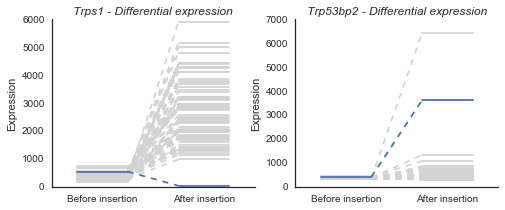

In [7]:
from imfusion.expression import read_exon_counts
from nbsupport import insertions as nb_ins

# Fetch counts and insertion objects.
exon_counts = read_exon_counts('../data/processed/sb/star/expression.txt')
insertion_objs = list(insertion_lookup.values())

# Plot DE for insertions.
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))

nb_ins.plot_single_de(
    insertion_objs, exon_counts, ax=axes[0],
    insertion=insertion_lookup['2800_34_12SKA091-L3.INS_27'])
axes[0].set_title('Trps1 - Differential expression', fontstyle='italic')

nb_ins.plot_single_de(
    insertion_objs, exon_counts, ax=axes[1],
    insertion=insertion_lookup['2049_13_11KOU051-R3.INS_4'])
axes[1].set_title('Trp53bp2 - Differential expression', fontstyle='italic');


# Plot again for manuscript.
with sns.plotting_context('paper', font_scale=0.7):
    
    # Trps1
    fig, ax = plt.subplots(figsize=(2, 1.6))
    
    nb_ins.plot_single_de(
        insertion_objs, exon_counts, ax=ax,
        insertion=insertion_lookup['2800_34_12SKA091-L3.INS_27'])
    ax.set_title('Trps1 - Differential expression', fontstyle='italic')
    
    fig.savefig('../reports/figures/fig_3b_trps1_de.pdf', bbox_inches='tight')
    plt.close(fig)
    
    # Trp53bp2
    fig, ax = plt.subplots(figsize=(2, 1.6))
    
    nb_ins.plot_single_de(
        insertion_objs, exon_counts, ax=ax,
        insertion=insertion_lookup['2049_13_11KOU051-R3.INS_4'])
    ax.set_title('Trp53bp2 - Differential expression', fontstyle='italic')

    fig.savefig('../reports/figures/fig_3d_trp53bp2_de.pdf', bbox_inches='tight')
    plt.close(fig)

This shows that the *Trps1* insertion indeed results in a significant decrease in expression, compared to background samples without an insertion (shown in grey). Similarly, the *Trp53bp2* insertion shows a significant increase in expression.

## Effects on CTGs

### Transposon feature bias

To determine how each identified CTG was affected by its insertions, we first analyzed the insertions in each CTG to identify if the gene was biased to SD or SA insertions. In this analysis, a bias to SD insertions would indicate the gene is mainly overexpressed by insertions in the gene. Conversely, a bias towards the SA/En2SA sites would indicate the gene is mainly truncated by its insertions.

We can quantify the number of SA/SD/En2SA insertions per gene easily by grouping insertions by their gene and transposon feature and counting the number of unique samples for each combination. Visualizing these counts using seaborns barplot gives us the following:

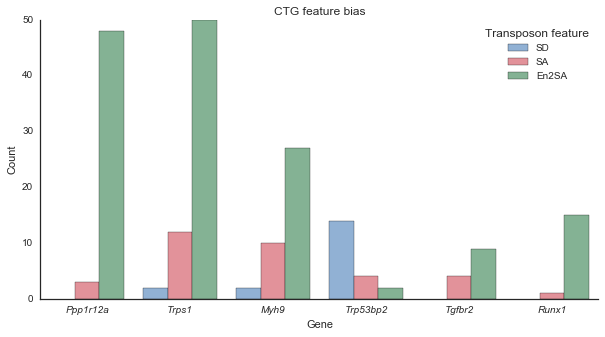

In [8]:
selected_hits = list(de_ctgs.query('de_pvalue < 0.05').head(n=6)['gene_name'])

fig, ax = plt.subplots(figsize=(10, 5))
nb_ins.plot_feature_bias(insertions, genes=selected_hits, ax=ax)
ax.set_title('CTG feature bias')

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(4, 2.3))
    nb_ins.plot_feature_bias(insertions, genes=selected_hits, ax=ax)
    ax.set_title('CTG feature bias')
    fig.savefig('../reports/figures/fig_3e_bias.pdf', bbox_inches='tight')
    plt.close(fig)

This shows a bias towards SD insertions for *Trp53bp2*, indicating that *Trp53bp2* is likely activated by its insertions. Conversely, the other top CTGs are clearly biased towards SA/En2SA insertions, suggesting that these genes are inactivated or truncated by their insertions.

We can also create the same plot for all identified CTGs:

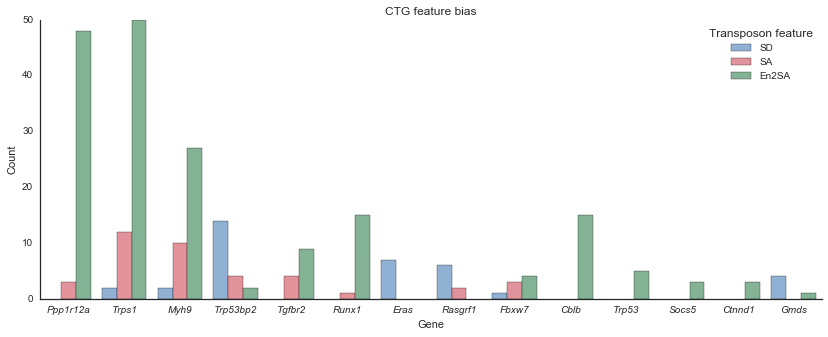

In [9]:
fig, ax = plt.subplots(figsize=(14, 5))
nb_ins.plot_feature_bias(insertions, genes=de_ctgs['gene_name'], ax=ax)
ax.set_title('CTG feature bias')

with sns.plotting_context('paper', font_scale=0.7):
    fig, ax = plt.subplots(figsize=(8, 2.3))
    nb_ins.plot_feature_bias(insertions, genes=de_ctgs['gene_name'], ax=ax)
    ax.set_title('CTG feature bias')
    fig.savefig('../reports/supplemental/figures/fig_s2a_bias.pdf', bbox_inches='tight')
    plt.close(fig)

### Differential expression

To determine if the expression of the CTGs is significantly affected by their insertions, we use IM-Fusions groupwise DE test to test for differential expression. For the top 6 CTGs, we can visualize the results of this test as a series of boxplots:

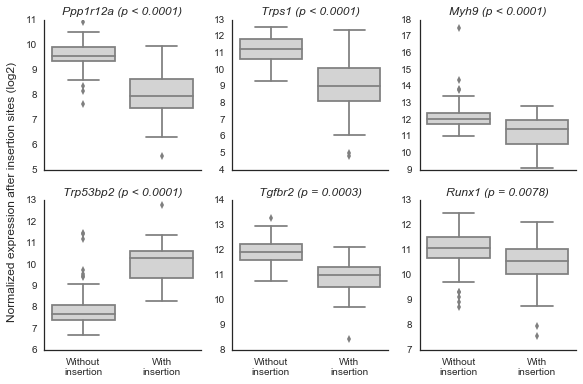

In [10]:
# Create map to translate gene ids to names.
gene_id_map = dict(zip(insertions['gene_name'], insertions['gene_id']))
selected_ids = [gene_id_map[hit] for hit in selected_hits]

# Create plots.
nb_ins.plot_de_multiple(
    insertion_objs, exon_counts, gene_names=selected_hits,
    gene_ids=selected_ids, figsize=(8, 5.5), ncols=3);

# Plot for manuscript.
with sns.plotting_context('paper', font_scale=0.7):
    fig = nb_ins.plot_de_multiple(
        insertion_objs, exon_counts, gene_names=selected_hits,
        gene_ids=selected_ids, figsize=(3.8, 2.7), ncols=3,
        box_kws={'linewidth': 0.75, 'fliersize': 2})
    fig.suptitle('CTG differential expression', fontsize=8, y=1.025)
    fig.savefig('../reports/figures/fig_3f_de.pdf', bbox_inches='tight')
    plt.close(fig)

This basically confirms our expectations from the feature bias analysis, as we see an increase of expression of *Trp53bp2* (indicating activation of the gene) and a decrease in expression for the remaining genes (suggesting truncation). 

We can also perform the same analysis for all CTGs:

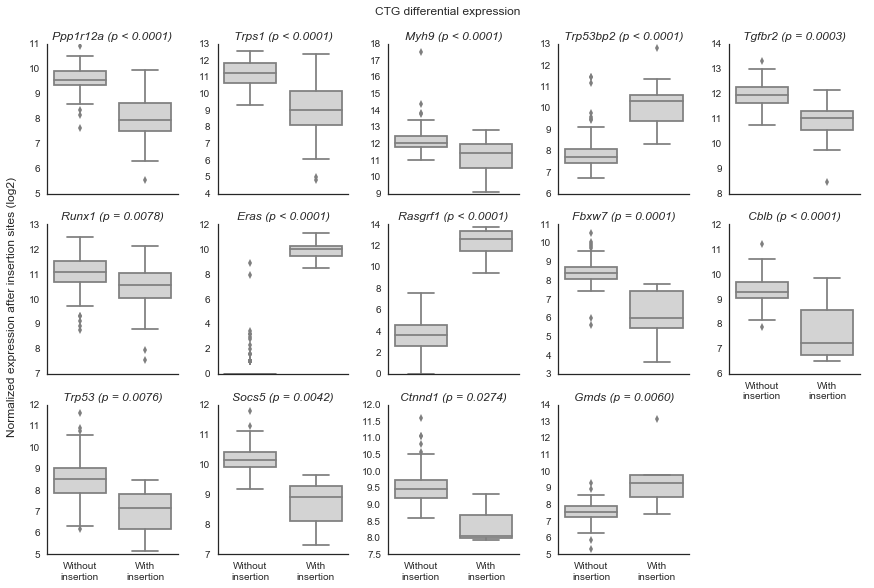

In [11]:
# Plot for all CTGs.
fig = nb_ins.plot_de_multiple(
    insertion_objs, exon_counts, gene_names=de_ctgs['gene_name'],
    gene_ids=de_ctgs['gene_id'],  figsize=(12, 8), ncols=5);

fig.axes[-6].set_xticks([0, 1])
fig.axes[-1].axis('off')

fig.suptitle('CTG differential expression', y=1.02, fontsize=12)

# Plot for manuscript.
with sns.plotting_context('paper', font_scale=0.7):    
    fig = nb_ins.plot_de_multiple(
        insertion_objs, exon_counts, gene_names=de_ctgs['gene_name'],
        gene_ids=de_ctgs['gene_id'], figsize=(6.5, 4), ncols=5,
        box_kws={'linewidth': 0.75, 'fliersize': 2})
    
    fig.axes[-6].set_xticks([0, 1])
    fig.axes[-1].axis('off')
    
    fig.suptitle('CTG differential expression', y=1.02, fontsize=7)
    
    fig.savefig('../reports/supplemental/figures/fig_s2b_de.pdf', bbox_inches='tight')
    
    plt.close(fig)